## HEART DISEASE PROJECT

### Submitted By - Surbhi Yadav
### Date - 12 Aug 2022

In [73]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [74]:
header = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','goal']
dfd = pd.read_csv('processed.cleveland.csv',names=header)
dfd.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [75]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  goal      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [76]:
dfd['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

## Dropping the null values

In [77]:
dfd.drop(dfd.loc[dfd["ca"] == "?", "ca"].index, axis=0,inplace=True)

In [78]:
dfd.drop(dfd.loc[dfd["thal"] == "?", "thal"].index, axis=0,inplace=True)

## Exploratory Data Analysis

<AxesSubplot:>

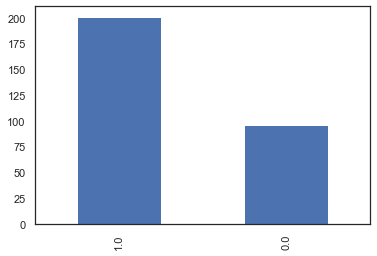

In [79]:
dfd['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

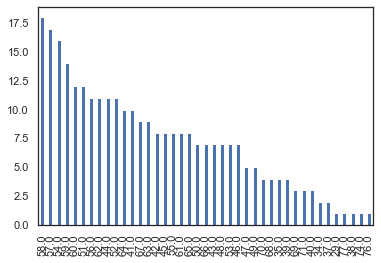

In [80]:
dfd['age'].value_counts().plot(kind='bar')

<AxesSubplot:>

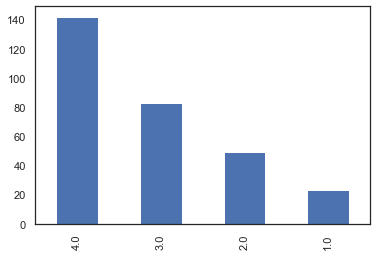

In [81]:
dfd['cp'].value_counts().plot(kind='bar')

<AxesSubplot:>

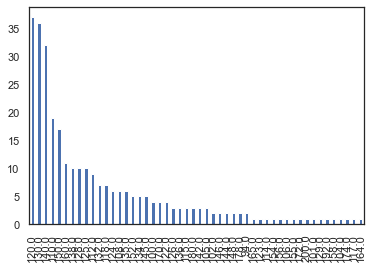

In [82]:
dfd['trestbps'].value_counts().plot(kind='bar')

<AxesSubplot:>

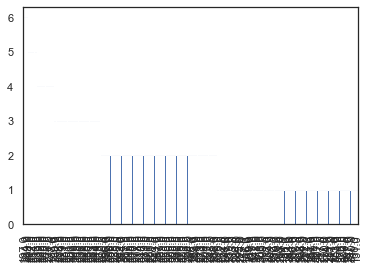

In [83]:
dfd['chol'].value_counts().plot(kind='bar')

<AxesSubplot:>

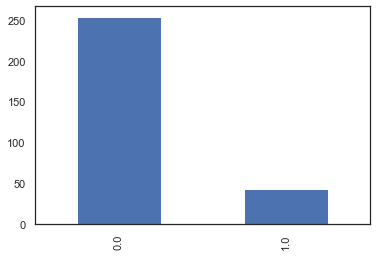

In [84]:
dfd['fbs'].value_counts().plot(kind='bar')

<AxesSubplot:>

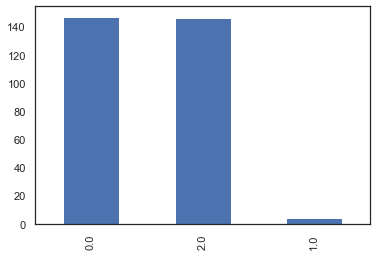

In [85]:
dfd['restecg'].value_counts().plot(kind='bar')

<AxesSubplot:>

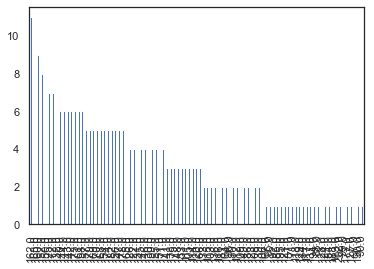

In [86]:
dfd['thalach'].value_counts().plot(kind='bar')

<AxesSubplot:>

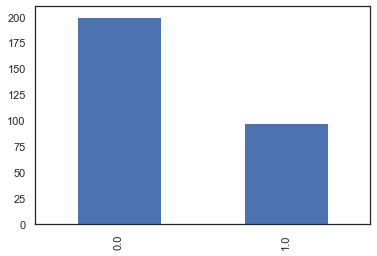

In [87]:
dfd['exang'].value_counts().plot(kind='bar')

<AxesSubplot:>

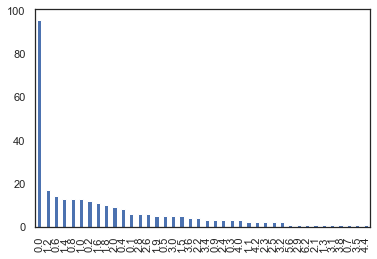

In [88]:
dfd['oldpeak'].value_counts().plot(kind='bar')

<AxesSubplot:>

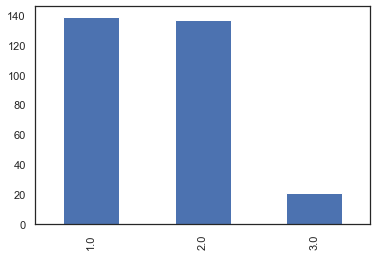

In [89]:
dfd['slope'].value_counts().plot(kind='bar')

<AxesSubplot:>

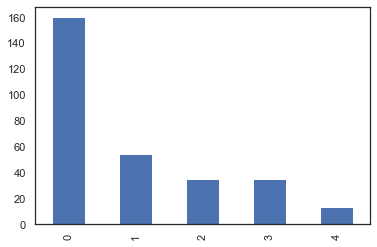

In [90]:
dfd['goal'].value_counts().plot(kind='bar')

In [91]:
dfd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Correlation Matrix

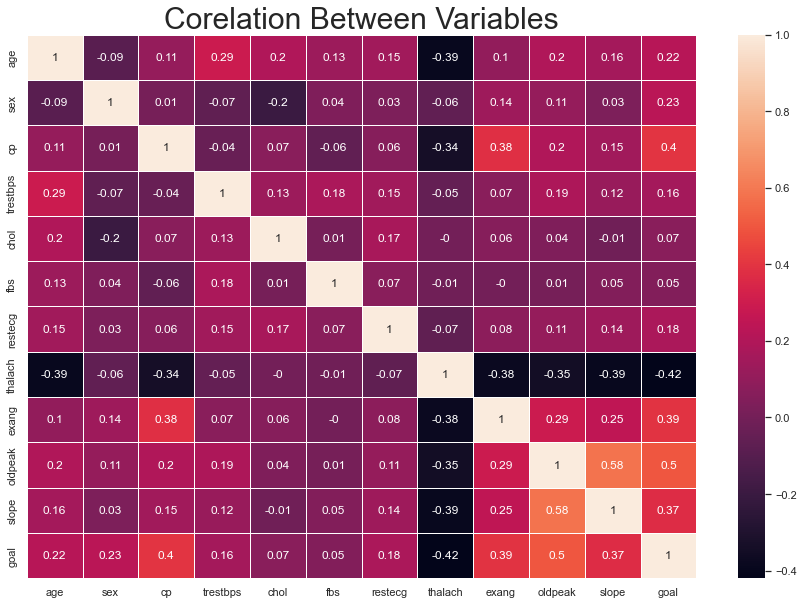

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(round(dfd.corr(),2), annot = True, linewidths=.5)
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

## Predictive Models:

### 1. Decision Trees

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [94]:
predictors = dfd[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values #removing goal column from the predictor as it is target varible
target = dfd["goal"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=3) # spliting training and testset

In [95]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dtc = DecisionTreeClassifier(random_state=x)
    dtc.fit(X_train,Y_train)
    Y_pred_dta = dtc.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dtc = DecisionTreeClassifier(random_state=best_x)
dtc.fit(X_train,Y_train)
Y_pred_dta = dtc.predict(X_test)
score_dta = round(accuracy_score(Y_pred_dta,Y_test)*100,2)

print("The accuracy through Decision Tree: "+str(score_dta)+" %")


The accuracy through Decision Tree: 55.0 %


### 2. Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

lrga = LogisticRegression()

lrga.fit(X_train,Y_train)

Y_pred_lra = lrg.predict(X_test)
score_lra = round(accuracy_score(Y_pred_lra,Y_test)*100,2)

print("The accuracy through Logistic Regression: "+str(score_lra)+" %")

The accuracy through Logistic Regression: 58.33 %


C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
